**Import necessary libaries and read the file**

In [1]:
import pandas as pd

path = '/content/sample_data.csv'
df = pd.read_csv(path)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


**Check some basic information of the dataset such as the number of rows and columns and data types for each column.**

The number of columns and rows

In [2]:
df.shape

(186850, 6)

Checking missing values and data types.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


**Clean up the dataset**

The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors.

In [ ]:
df.isnull().sum()

,0
Order ID,545
Product,545
Quantity Ordered,545
Price Each,545
Order Date,545
Purchase Address,545


Removing missing values.

In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


Delete duplicate values.

In [ ]:
df.drop_duplicates(inplace = True)

This is the number of rows and columns after deleting missing values and duplicated values.

In [ ]:
df.shape

(185687, 6)

Convert to the right data type.


In [ ]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df['Price Each'], errors = 'coerce')
df["Order Date"] = pd.to_datetime(df['Order Date'], errors = 'coerce')
df.dtypes

<ipython-input-41-0c36d66a6f33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
<ipython-input-41-0c36d66a6f33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price Each"] = pd.to_numeric(df['Price Each'], errors = 'coerce')
<ipython-input-41-0c36d66a6f33>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format

,0
Order ID,float64
Product,object
Quantity Ordered,int64
Price Each,float64
Order Date,datetime64[ns]
Purchase Address,object


In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


Create a new column called "Sales".

In [ ]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]
df

<ipython-input-44-072f53b387db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sales"] = df["Quantity Ordered"] * df["Price Each"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97
186846,259354.0,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00
186847,259355.0,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00
186848,259356.0,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99


Descriptive statistic.

In [ ]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Order Date,Sales
count,185686.000000,185686.000000,185686.000000,185686,185686.000000
mean,230411.376227,1.124544,184.519255,2019-07-18 21:32:06.298051840,185.611936
min,141234.000000,1.000000,2.990000,2019-01-01 03:07:00,2.990000
25%,185833.250000,1.000000,11.950000,2019-04-16 20:55:15,11.950000
50%,230354.500000,1.000000,14.950000,2019-07-17 20:11:00,14.950000
75%,275028.750000,1.000000,150.000000,2019-10-26 08:00:00,150.000000
max,319670.000000,9.000000,1700.000000,2020-01-01 05:13:00,3400.000000
std,51511.717183,0.443069,332.843838,NaN,333.032118


Visualize box plot for column 'Price Each'.

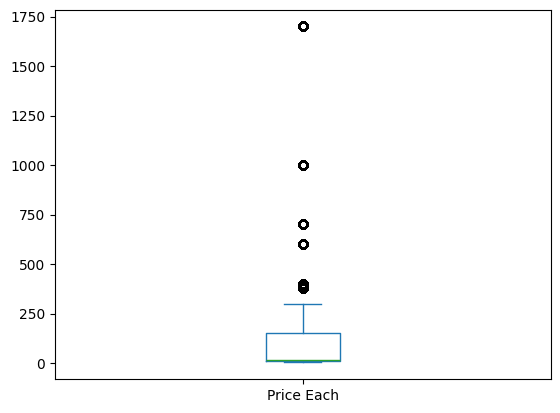

In [ ]:
import matplotlib.pyplot as plt
df['Price Each'].plot(kind = 'box')
plt.show()

In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97
186846,259354.0,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00
186847,259355.0,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00
186848,259356.0,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99


Add new columns :  "Year",  "Month",  "Day", "Hour"

In [ ]:
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month
df["Day"] = df["Order Date"].dt.day
df["Hour"] = df["Order Date"].dt.hour

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Year,Month,Day,Hour
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,19,8
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,7,22
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,12,14
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,12,14
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,30,9
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,2019,9,17,20
186846,259354.0,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,2019,9,1,16
186847,259355.0,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,2019,9,23,7
186848,259356.0,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,2019,9,19,17


Drop columns "Order Date"

In [ ]:
df.drop(columns = {"Order Date"}, inplace = True)
df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,Year,Month,Day,Hour
0,176558.0,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",23.90,2019,4,19,8
2,176559.0,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,7,22
3,176560.0,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,12,14
4,176560.0,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,12,14
5,176561.0,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,30,9
...,...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",8.97,2019,9,17,20
186846,259354.0,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",700.00,2019,9,1,16
186847,259355.0,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",700.00,2019,9,23,7
186848,259356.0,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",379.99,2019,9,19,17


Break down columns "Purchase Address" to other columns.

In [ ]:
df[["Address", "City", "State and Zip code"]] = df["Purchase Address"].str.split(",", n = 3, expand = True)
df[['State', 'Zip Code']] = df['State and Zip code'].str.strip().str.split(" ", n=1, expand=True)

df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,Year,Month,Day,Hour,Address,City,State and Zip code,State,Zip Code
0,176558.0,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",23.90,2019,4,19,8,917 1st St,Dallas,TX 75001,TX,75001
2,176559.0,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,7,22,682 Chestnut St,Boston,MA 02215,MA,02215
3,176560.0,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,12,14,669 Spruce St,Los Angeles,CA 90001,CA,90001
4,176560.0,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,12,14,669 Spruce St,Los Angeles,CA 90001,CA,90001
5,176561.0,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,30,9,333 8th St,Los Angeles,CA 90001,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",8.97,2019,9,17,20,840 Highland St,Los Angeles,CA 90001,CA,90001
186846,259354.0,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",700.00,2019,9,1,16,216 Dogwood St,San Francisco,CA 94016,CA,94016
186847,259355.0,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",700.00,2019,9,23,7,220 12th St,San Francisco,CA 94016,CA,94016
186848,259356.0,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",379.99,2019,9,19,17,511 Forest St,San Francisco,CA 94016,CA,94016


Remove unnecessary columns

In [ ]:
df.drop(columns = ["Purchase Address", "State and Zip code"], inplace = True)
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Year,Month,Day,Hour,Address,City,State,Zip Code
0,176558.0,USB-C Charging Cable,2,11.95,23.90,2019,4,19,8,917 1st St,Dallas,TX,75001
2,176559.0,Bose SoundSport Headphones,1,99.99,99.99,2019,4,7,22,682 Chestnut St,Boston,MA,02215
3,176560.0,Google Phone,1,600.00,600.00,2019,4,12,14,669 Spruce St,Los Angeles,CA,90001
4,176560.0,Wired Headphones,1,11.99,11.99,2019,4,12,14,669 Spruce St,Los Angeles,CA,90001
5,176561.0,Wired Headphones,1,11.99,11.99,2019,4,30,9,333 8th St,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3,2.99,8.97,2019,9,17,20,840 Highland St,Los Angeles,CA,90001
186846,259354.0,iPhone,1,700.00,700.00,2019,9,1,16,216 Dogwood St,San Francisco,CA,94016
186847,259355.0,iPhone,1,700.00,700.00,2019,9,23,7,220 12th St,San Francisco,CA,94016
186848,259356.0,34in Ultrawide Monitor,1,379.99,379.99,2019,9,19,17,511 Forest St,San Francisco,CA,94016


Change month to category.

In [ ]:
df['Month Name'] = pd.to_datetime(df['Month'], format='%m').dt.strftime('%B')
df.drop(columns = "Month", inplace = True)
df.rename(columns = {"Month Name": "Month"}, inplace = True)
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Year,Day,Hour,Address,City,State,Zip Code,Month
0,176558.0,USB-C Charging Cable,2,11.95,23.90,2019,19,8,917 1st St,Dallas,TX,75001,April
2,176559.0,Bose SoundSport Headphones,1,99.99,99.99,2019,7,22,682 Chestnut St,Boston,MA,02215,April
3,176560.0,Google Phone,1,600.00,600.00,2019,12,14,669 Spruce St,Los Angeles,CA,90001,April
4,176560.0,Wired Headphones,1,11.99,11.99,2019,12,14,669 Spruce St,Los Angeles,CA,90001,April
5,176561.0,Wired Headphones,1,11.99,11.99,2019,30,9,333 8th St,Los Angeles,CA,90001,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3,2.99,8.97,2019,17,20,840 Highland St,Los Angeles,CA,90001,September
186846,259354.0,iPhone,1,700.00,700.00,2019,1,16,216 Dogwood St,San Francisco,CA,94016,September
186847,259355.0,iPhone,1,700.00,700.00,2019,23,7,220 12th St,San Francisco,CA,94016,September
186848,259356.0,34in Ultrawide Monitor,1,379.99,379.99,2019,19,17,511 Forest St,San Francisco,CA,94016,September


Now the dataset has been cleaned and ready to explore and visualize.

**Data Visualization and exploration.**

Question 1: What was the best month for sale ?

In [ ]:
import pandas as pd

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

Total_Sales_by_month = df.groupby("Month")["Sales"].sum().sort_index()

Total_Sales_by_month


<ipython-input-83-5d05cdc69632>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Total_Sales_by_month = df.groupby("Month")["Sales"].sum().sort_index()


,Sales
Month,
January,1821413.16
February,2200078.08
March,2804973.35
April,3389217.98
May,3150616.23
June,2576280.15
July,2646461.32
August,2241083.37
September,2094465.69


Text(0.5, 1.0, 'Total sales by month')

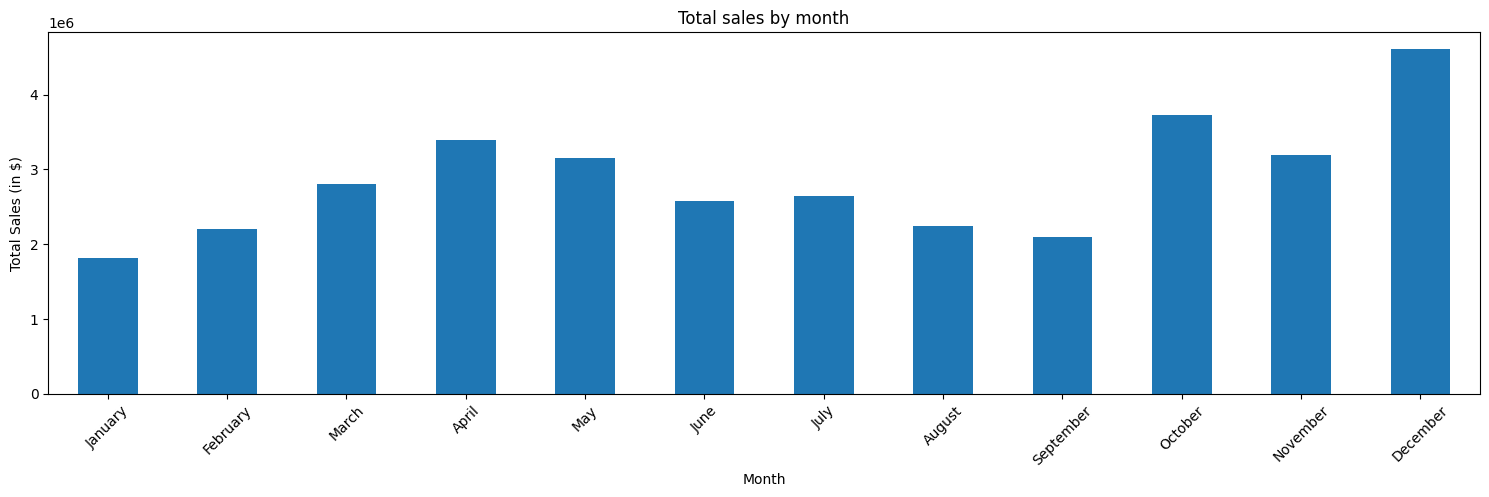

In [ ]:
plt.figure(figsize = (15,5))
Total_Sales_by_month.plot(kind = 'bar')
plt.xlabel("Month")
plt.ylabel("Total Sales (in $)")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.title("Total sales by month")

**Question 2 : What city sell the most products ?**

In [ ]:
Sales_by_city = df.groupby("City")["Sales"].sum()
Sales_by_city

,Sales
City,
Atlanta,2794199.07
Austin,1818044.33
Boston,3658627.65
Dallas,2765373.96
Los Angeles,5448304.28
New York City,4661867.14
Portland,2319331.94
San Francisco,8254743.55
Seattle,2745046.02


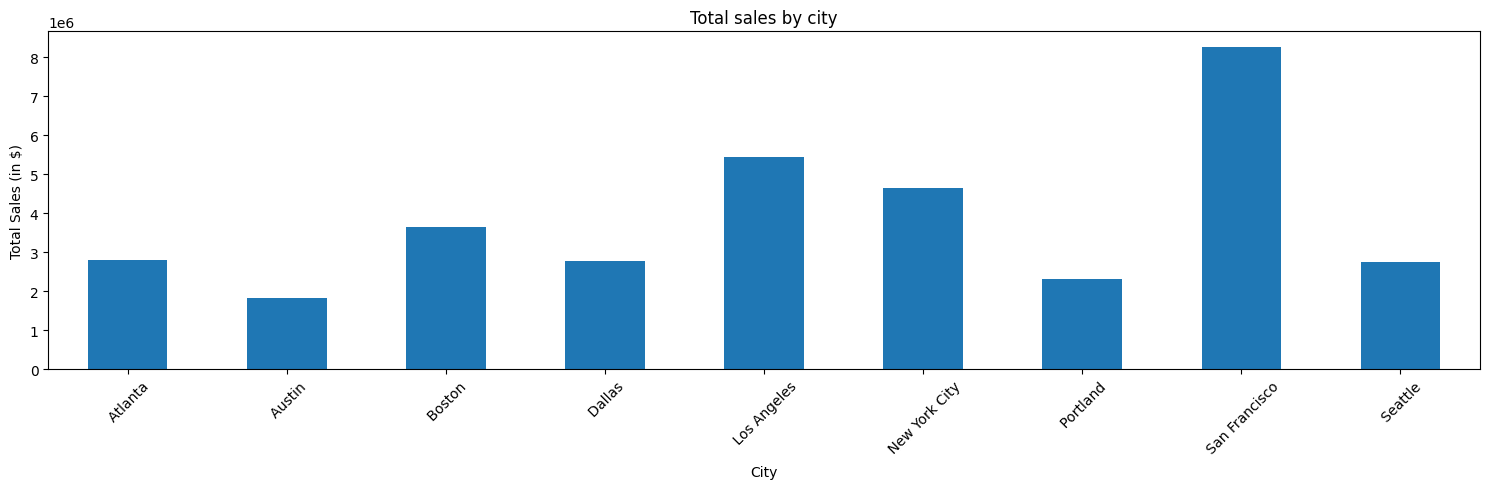

In [ ]:
plt.figure(figsize = (15, 5))
Sales_by_city.plot(kind = "bar")
plt.xlabel("City")
plt.ylabel("Total Sales (in $)")
plt.title("Total sales by city")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

**Question 3: What time did the customers buy products the most ? When should we need to display advertisements ?**

In [ ]:
Sales_by_time = df.groupby("Hour")["Sales"].sum()
Sales_by_time

,Sales
Hour,
0,713548.66
1,460563.90
2,234839.45
3,145742.94
4,162546.07
5,230664.87
6,447963.01
7,744067.32
8,1192309.20


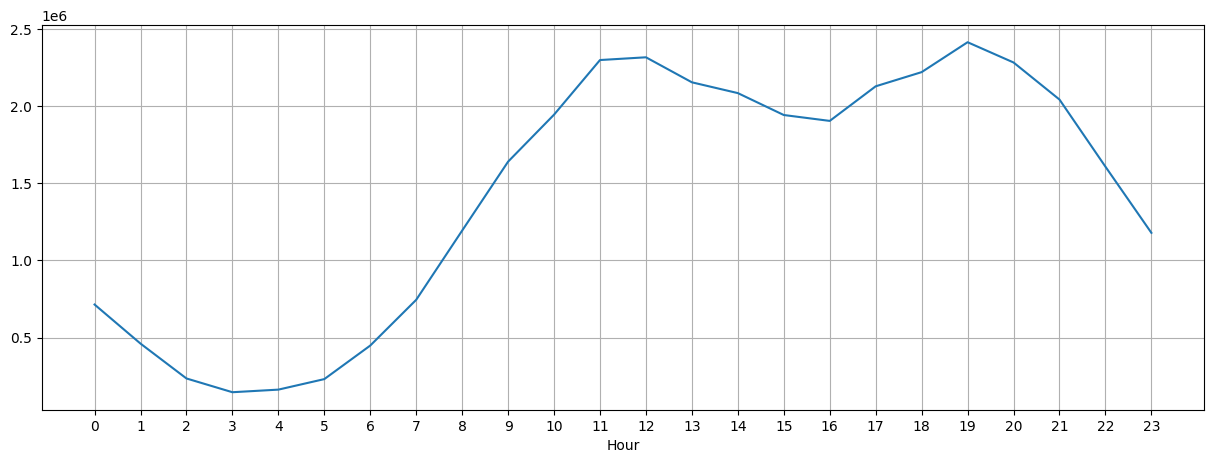

In [ ]:
plt.figure(figsize = (15, 5))
Sales_by_time.plot(kind = 'line')
plt.xticks(ticks = range(0, 24))
plt.grid()
plt.show()

# The time periods from 8-10 AM and 5-7 PM show peaks on the chart, indicating the highest sales volumes.
#This likely reflects peak customer activity, such as at the start of the workday or after work hours, when people tend to shop more.

**Question 4 : What products sold the most ? Why ?**

In [ ]:
Total_Ordered = df.groupby("Product")["Quantity Ordered"].sum()
Total_Ordered

,Quantity Ordered
Product,
20in Monitor,4126
27in 4K Gaming Monitor,6239
27in FHD Monitor,7541
34in Ultrawide Monitor,6192
AA Batteries (4-pack),27615
AAA Batteries (4-pack),30986
Apple Airpods Headphones,15637
Bose SoundSport Headphones,13430
Flatscreen TV,4813


<Axes: ylabel='Product'>

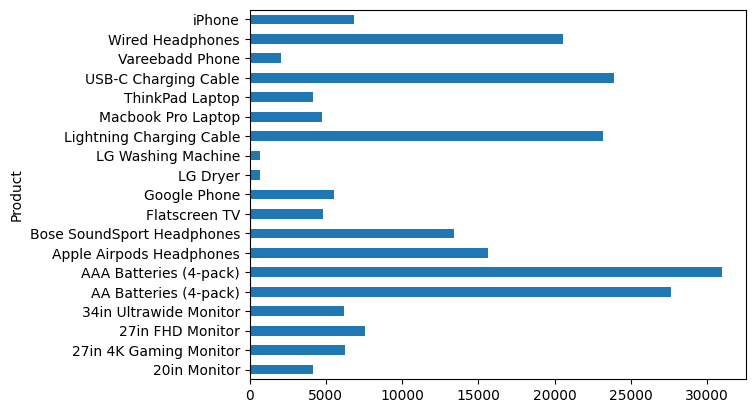

In [ ]:
Total_Ordered.plot(kind = 'barh')

""" AAA and AA batteries (4-packs) are the most purchased items,
likely because they are small, affordable,
and widely used in everyday devices like remote controls, toys, and flashlights.
Their versatility and frequent need for replacement make them a high-demand product compared to more expensive or less frequently needed items like monitors or appliances.

**Question 5: What is the total sales of each year ? Why ?**

In [ ]:
Sales_by_year = df.groupby("Year")["Sales"].sum()
Sales_by_year
# Year 2019 has most sales because this year is before Covid-19 breaked out.

,Sales
Year,
2019,34456867.65
2020,8670.29


**Question 6: What is the total sales for each state ? Where shoud we focus advertisement on ?**

In [ ]:
Sales_by_state = df.groupby("State")['Sales'].sum()
Sales_by_state

,Sales
State,
CA,13703047.83
GA,2794199.07
MA,3658627.65
ME,449321.38
NY,4661867.14
OR,1870010.56
TX,4583418.29
WA,2745046.02


Text(0.5, 1.0, 'Total sales by state')

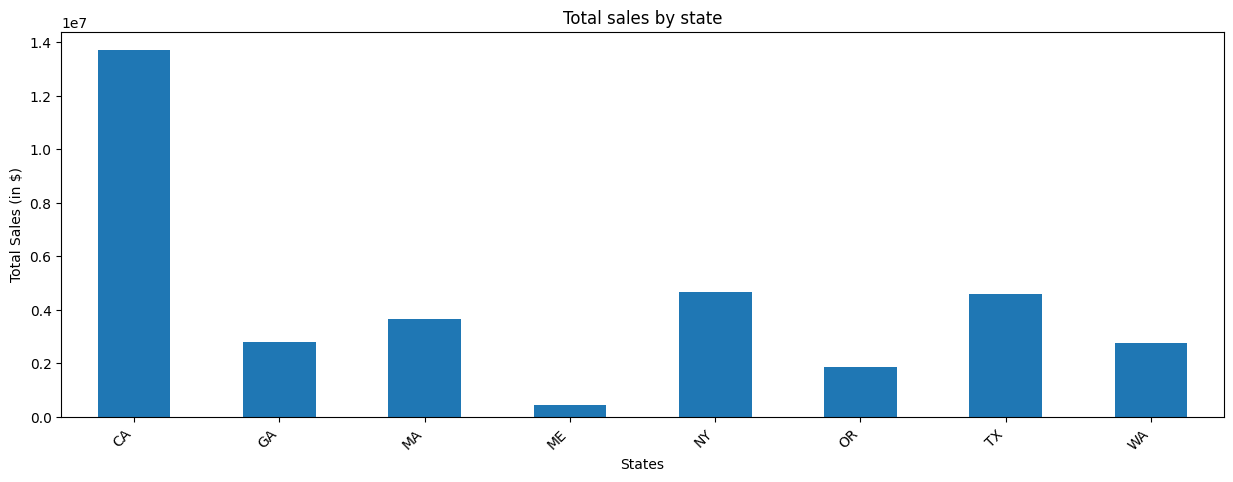

In [ ]:
plt.figure(figsize = (15, 5))
Sales_by_state.plot(kind = 'bar')
plt.xlabel("States")
plt.ylabel("Total Sales (in $)")
plt.xticks(rotation = 45, ha = 'right')
plt.title("Total sales by state")
# Highest priority: CA State
# - Reason: Highest sales (14 million USD), large and stable market

# Second priority: NY, TX States
# - Reason: Stable sales (0.4-0.5 million USD), expansion potential

# Low priority: GA, MA, WA States
# - Reason: Average sales (0.2-0.3 million USD), limited potential

# No priority: ME State
# - Reason: Near-zero sales, unsuitable market
